In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, stdev
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
top = pd.read_csv("top_users_vids.csv")
sug = pd.read_csv("sug_users_vids_all.csv")

In [3]:
new_sug = sug.loc[sug['n_plays'] < 10000000]

In [4]:
just_users = sug[['user_name', 'n_followers', 'n_total_likes', 'n_total_vids']].drop_duplicates('user_name')
just_users

user_name  n_followers  n_total_likes  n_total_vids
0                  john.cena10      1000000        4700000           211
25     robertdowneyjnrofficial       651100         144000             3
28                        shaq      2500000        4800000            62
53                   lazarbeam      5900000       44500000            51
78                     mrbeast     12600000      141000000           129
...                        ...          ...            ...           ...
41577               briteresi0        74100         287900            90
41602               lynaperezz      3200000       41800000           243
41627            girlgainzblog        59700         246800           203
41652                berryemi1       144000         455000           119
41677          victoriabachlet      3600000      141500000           987

[1705 rows x 4 columns]

## Visualization of the distribution of followers for our data set

- around 10% of users in our data set has more than 10 million followers
- around 35% of users in our data set has less than 1 million followers


In [423]:
len(just_users[just_users['n_followers'] < 1000000]) / len(just_users)

0.35249266862170087

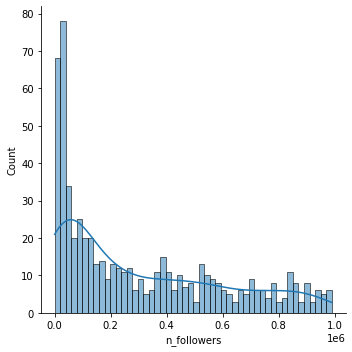

In [6]:
sns.displot(just_users[just_users['n_followers'] < 1000000], x='n_followers', bins=50, kde=True)

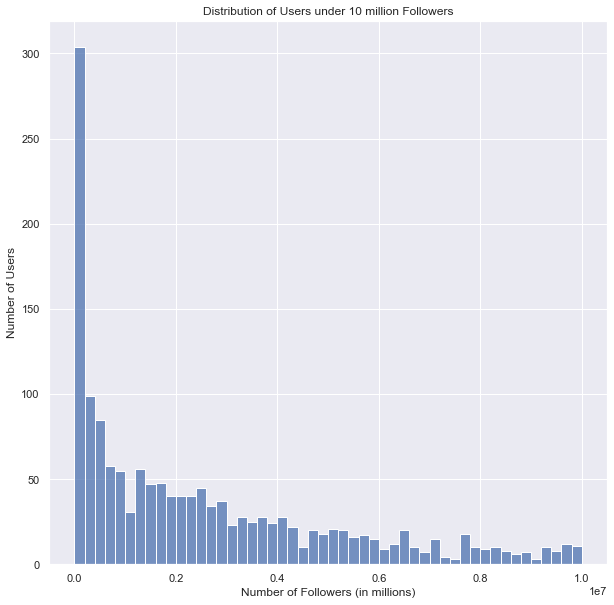

In [415]:
fig, ax = plt.subplots(figsize=(10,10))

sns.set_theme()
sns.histplot(just_users[just_users['n_followers'] <= 10000000], x='n_followers', bins=50, ax=ax)
plt.ylabel('Number of Users')
plt.xlabel('Number of Followers (in millions)')
plt.title("Distribution of Users under 10 million Followers")
plt.savefig('user_followers_distr_1.png', dpi=1000, facecolor='w')

In [416]:
# fig, ax = plt.subplots(figsize=(10, 10))

# sns.set_theme()
# sns.histplot(just_users, x='n_followers', bins=100, ax=ax)
# plt.ylabel('Number of Users')
# plt.xlabel('Number of Followers (in millions)')
# plt.title("Distribution of Users")
# plt.savefig('user_followers_distr_2.png', dpi=1000, facecolor='w')

## Determining which videos are trending/better performing

Using standard deviation, we are able to determine which videos of each users aer better performing compared to teh rest of the videos from the user.

In [80]:
by_user = {}
for i in just_users['user_name']:
    by_user[i] = sug[sug['user_name'] == i][1:].reset_index(drop = True)
    # ignored first entry because video might have just been posted
#by_user

### Outliers Function

This function inputs a list of values and the desired standard deviation for determining outliers.

The function outputs a list of indices of upper outliers based on the standard deviation chosen.

In [11]:
def upper_outliers(x, std = 1):
    outliers_index = []
    Xmean = mean(x)
    Xstd = stdev(x)
    limit = Xmean + std*Xstd
    for i, val in enumerate(x):
        if val > limit:
            outliers_index.append(i)
    return outliers_index

In [81]:
for i in by_user:
    try:
        by_user[i].loc[upper_outliers(by_user[i]['n_plays'], 1), 'outlier_1'] = True
        by_user[i].loc[upper_outliers(by_user[i]['n_plays'], 2), 'outlier_2'] = True
        by_user[i].loc[pd.isnull(by_user[i]['outlier_1']), 'outlier_1'] = False
        by_user[i].loc[pd.isnull(by_user[i]['outlier_2']), 'outlier_2'] = False
    except:
        # users with less than 2 posts
        by_user[i].loc[0, 'outlier_1'] = False
        by_user[i].loc[0, 'outlier_2'] = False

### Reforming the by_user dictionary back to full data frame

In [82]:
sug_df = pd.concat([by_user[i] for i in by_user]).reset_index(drop = True)

In [83]:
sug_df

id   create_time        user_name  \
0      6.891790e+18  1.604620e+09      john.cena10   
1      6.891265e+18  1.604498e+09      john.cena10   
2      6.891050e+18  1.604448e+09      john.cena10   
3      6.890886e+18  1.604409e+09      john.cena10   
4      6.890500e+18  1.604320e+09      john.cena10   
...             ...           ...              ...   
39995  6.886179e+18  1.603314e+09  victoriabachlet   
39996  6.885925e+18  1.603254e+09  victoriabachlet   
39997  6.885815e+18  1.603229e+09  victoriabachlet   
39998  6.885807e+18  1.603227e+09  victoriabachlet   
39999  6.885568e+18  1.603171e+09  victoriabachlet   

                                                hashtags  \
0      ['johncena', 'love', 'tiktok', 'halloween', 'q...   
1              ['johncena', 'love', 'fyp', 'foryoupage']   
2      ['johncena', 'fyp', 'foryoupage', 'viral', 'co...   
3             ['johncena', 'foryoupage', 'fyp', 'viral']   
4      ['johncena', 'foryoupage', 'fyp', 'viral', 'co...   
...                                                  ...   
39995                                                 []   
39996                                                 []   
39997                                                 []   
39998                                                 []   
39999                                                 []   

                              song  video_length   n_likes  n_shares  \
0                     ÿßŸÑÿµŸàÿ™ ÿßŸÑÿ£ÿµŸÑŸä           6.0    7372.0       9.0   
1      The Time Is Now (John Cena)           5.0    4623.0      11.0   
2                     ÿßŸÑÿµŸàÿ™ ÿßŸÑÿ£ÿµŸÑŸä           6.0    7931.0       6.0   
3                     ÿßŸÑÿµŸàÿ™ ÿßŸÑÿ£ÿµŸÑŸä          15.0    3229.0       9.0   
4                     ÿßŸÑÿµŸàÿ™ ÿßŸÑÿ£ÿµŸÑŸä          23.0    8021.0      24.0   
...                            ...           ...       ...       ...   
39995               original sound          19.0   23900.0      48.0   
39996               original sound          13.0   40300.0     211.0   
39997               original sound          18.0   21400.0      49.0   
39998       wheres my love by syml          18.0   50100.0     331.0   
39999               original sound          16.0  219400.0    2428.0   

       n_comments   n_plays  n_followers  n_total_likes  n_total_vids  \
0            51.0   52800.0    1000000.0      4700000.0         211.0   
1            27.0   37700.0    1000000.0      4700000.0         211.0   
2            24.0   51200.0    1000000.0      4700000.0         211.0   
3            14.0   24700.0    1000000.0      4700000.0         211.0   
4            54.0   49600.0    1000000.0      4700000.0         211.0   
...           ...       ...          ...            ...           ...   
39995       181.0  110300.0    3600000.0    141500000.0         987.0   
39996       229.0  181100.0    3600000.0    141500000.0         987.0   
39997       142.0  106800.0    3600000.0    141500000.0         987.0   
39998      1148.0  188800.0    3600000.0    141500000.0         987.0   
39999      2552.0  681900.0    3600000.0    141500000.0         987.0   

      outlier_1 outlier_2  
0         False     False  
1         False     False  
2         False     False  
3         False     False  
4         False     False  
...         ...       ...  
39995     False     False  
39996     False     False  
39997     False     False  
39998     False     False  
39999     False     False  

[40000 rows x 15 columns]

In [87]:
print("outliers of 1 std:", sum(sug_df['outlier_1']))
print("non-outliers:", len(sug_df) - sum(sug_df['outlier_1']))

outliers of 1 std: 4420
non-outliers: 35580


In [89]:
print("outliers of 2 std:", sum(sug_df['outlier_2']))
print("non-outliers:", len(sug_df) - sum(sug_df['outlier_2']))

outliers of 2 std: 2229
non-outliers: 37771


In [100]:
sug_df = sug_df.loc[sug_df['video_length'] <= 60].reset_index(drop = True)

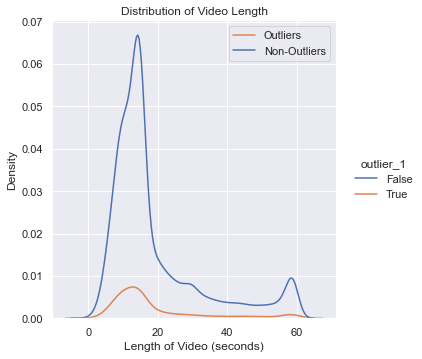

In [113]:
sns.displot(data=sug_df, x='video_length', hue="outlier_1", kind='kde')
plt.ylabel('Density')
plt.xlabel('Length of Video (seconds)')
plt.title("Distribution of Video Length")
plt.legend(['Outliers', 'Non-Outliers'])
#plt.savefig('dist_vid_len.png', dpi=1000, facecolor='w')

### Amount of Hashtags

Adding a column to sug_df that contains the amount of hashtags of each video

In [115]:
def amnt_of_hashtags(x):
    amnt = []
    for i in x:
        if i.replace("'", "").strip('][').split(', ') == ['']:
            amnt.append(0)
        else:
            amnt.append(len(i.replace("'", "").strip('][').split(', ')))
    return amnt

In [119]:
sug_df.columns

Index(['id', 'create_time', 'user_name', 'hashtags', 'song', 'video_length',
       'n_likes', 'n_shares', 'n_comments', 'n_plays', 'n_followers',
       'n_total_likes', 'n_total_vids', 'outlier_1', 'outlier_2',
       'n_hashtags'],
      dtype='object')

### Reording the columns of data frame

Also added a new column that contains the number of hashtags in each video

In [120]:
sug_df['n_hashtags'] = amnt_of_hashtags(sug_df['hashtags'])
sug_df = sug_df[['id', 'create_time', 'user_name', 'hashtags', 'n_hashtags',
                 'song', 'video_length', 'n_likes', 'n_shares', 'n_comments',
                 'n_plays', 'n_followers', 'n_total_likes', 'n_total_vids',
                 'outlier_1', 'outlier_2']]

<AxesSubplot:xlabel='n_hashtags', ylabel='Count'>

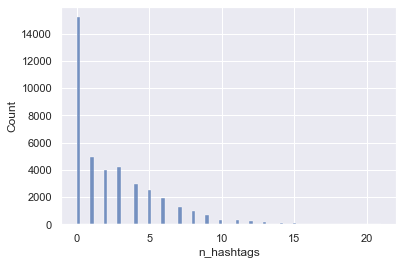

In [296]:
sns.histplot(data=sug_df, x='n_hashtags')

In [393]:
len(sug_df.loc[(sug_df['outlier_2']) & (sug_df['n_hashtags'] > 0)]) / len(sug_df.loc[sug_df['outlier_2']])

0.6234290843806104

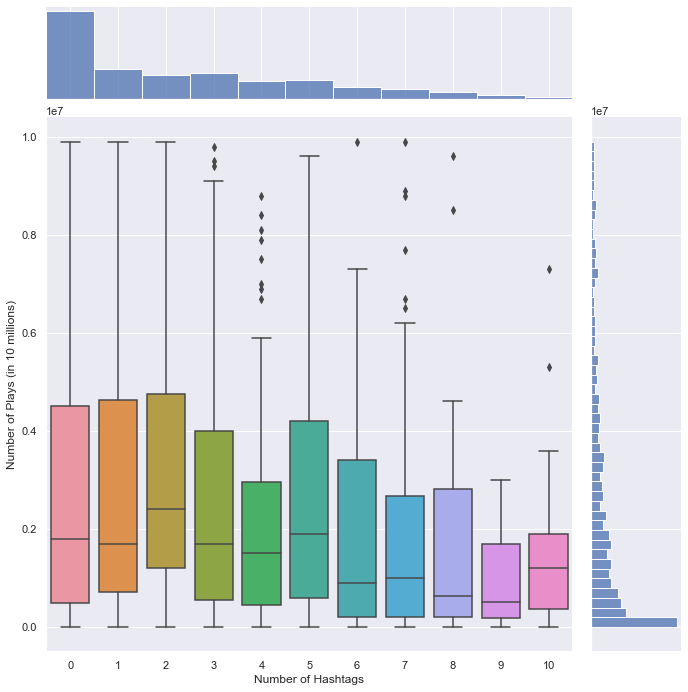

In [433]:
sns.set_theme()
df = sug_df.loc[(sug_df['outlier_2']) & (sug_df['n_plays'] < 10000000) & (sug_df['n_hashtags'] <= 10)]

g = sns.JointGrid()
g.fig.set_figwidth(10)
g.fig.set_figheight(10)

x, y = df['n_hashtags'], df['n_plays']
sns.histplot(x=x, bins=10, discrete=True, ax=g.ax_marg_x)
sns.histplot(y=y, bins=50, ax=g.ax_marg_y)
sns.boxplot(x=x, y=y, ax=g.ax_joint)
g.set_axis_labels('Number of Hashtags', 'Number of Plays (in 10 millions)')
#plt.savefig('nhashtags_vs_nplays.png', dpi=1000, facecolor='w')

## Hashtag Word Cloud

In [299]:
def extract_hashtags(x, unique = False):
    hashtags = []
    for i in x:
        # the lists of hashtags are stored as string representation of a list
        hashtags = hashtags + i.replace("'", "").strip('][').split(', ')
    if unique:
        return np.unique(hashtags)
    else:
        return hashtags

In [300]:
def freq_list(x):  
    freq = {} 
    for i in x: 
        if (i in freq): 
            freq[i] += 1
        else: 
            freq[i] = 1
    return freq

In [310]:
all_h = sorted(freq_list(extract_hashtags(sug_df['hashtags'])).items(),
             key=lambda x: x[1], reverse=True)
outlier_h = sorted(freq_list(extract_hashtags(sug_df.loc[sug_df['outlier_1']]['hashtags'])).items(),
                  key=lambda x: x[1], reverse=True)

In [331]:
def convert(tup):
    d = {'hashtag': [], 'count': []}
    for a, b in tup:
        d['hashtag'].append(a)
        d['count'].append(b)
    return d

In [348]:
all_df = pd.DataFrame.from_dict(data=convert(all_h)).set_index('hashtag')
outlier_df = pd.DataFrame.from_dict(data=convert(outlier_h)).set_index('hashtag').rename(columns={'count': 'outlier_count'})

In [350]:
hashtag_df = pd.concat([all_df, outlier_df], axis=1, sort=False)
hashtag_df.reset_index(inplace=True)
hashtag_df = hashtag_df.rename(columns={'index': 'hashtag'})

<AxesSubplot:xlabel='hashtag', ylabel='outlier_count'>

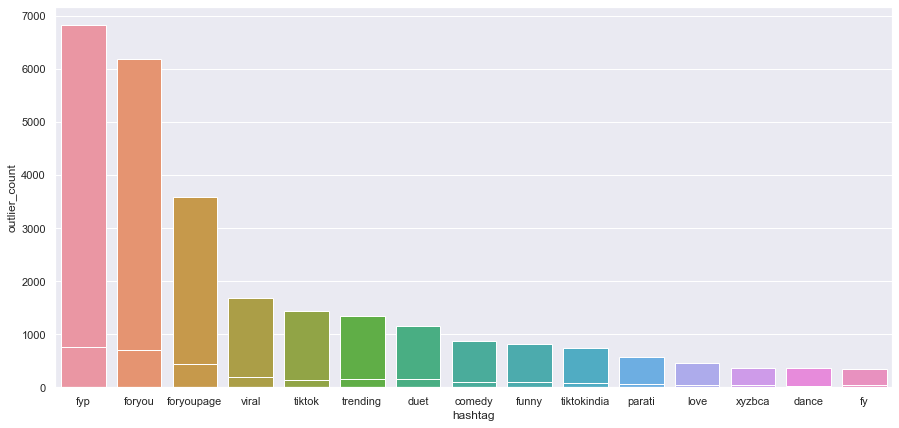

In [365]:
fig, ax = plt.subplots(figsize=(15, 7))


sns.barplot(data=hashtag_df.loc[1:15], x='hashtag', y='count', ax=ax)
sns.barplot(data=hashtag_df.loc[1:15], x='hashtag', y='outlier_count', ax=ax)

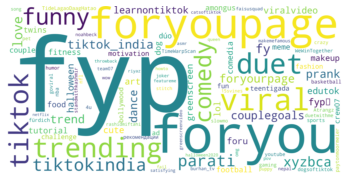

In [371]:
freq = freq_list(extract_hashtags(sug_df.loc[sug_df['outlier_1']]['hashtags']))
wc = WordCloud(background_color="white", max_words=100, width=4000, height=2000).generate_from_frequencies(freq)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('hash_wordcloud.png')

<AxesSubplot:xlabel='n_followers', ylabel='n_total_vids'>

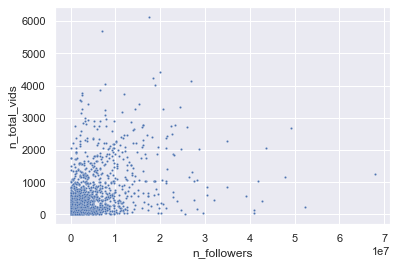

In [428]:
sns.scatterplot(data=just_users, x='n_followers', y='n_total_vids', s=5)

### see how shares correlate to views

In [110]:
x = sug_df['n_shares'].tolist()
y = sug_df['n_plays'].tolist()

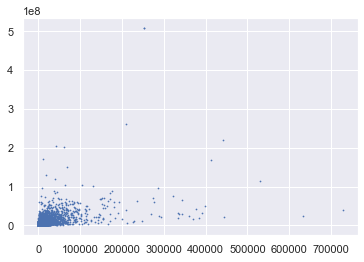

In [111]:
plt.scatter(x, y, s=.5)

# Below this is old code

In [29]:
def pct_atlst1(x):
    atlst1 = 0
    for i in x:
        if i > 0:
            atlst1 += 1
    return atlst1 / len(x)

In [30]:
print(pct_atlst1(amnt_of_hashtags(outliers_2_df['hashtags'])))
print('\n')
print(pct_atlst1(amnt_of_hashtags(non_outliers_2_df['hashtags'])))

0.6235980260206371


0.6187650564219602


In [31]:
def extract_hashtags(x, unique = False):
    hashtags = []
    for i in x:
        # the lists of hashtags are stored as string representation of a list
        hashtags = hashtags + i.replace("'", "").strip('][').split(', ')
    if unique:
        return np.unique(hashtags)
    else:
        return hashtags

In [32]:
outliers_hashtags_1 = extract_hashtags(outliers_1_df['hashtags'])
outliers_hashtags_2 = extract_hashtags(outliers_2_df['hashtags'])
non_outliers_hashtags_1 = extract_hashtags(non_outliers_1_df['hashtags'])
non_outliers_hashtags_2 = extract_hashtags(non_outliers_2_df['hashtags'])

In [33]:
def freq_list(x):  
    freq = {} 
    for i in x: 
        if (i in freq): 
            freq[i] += 1
        else: 
            freq[i] = 1
    return freq

In [34]:
sorted(freq_list(outliers_hashtags_1).items(), key=lambda x: x[1], reverse=True)

[('', 1725),
 ('fyp', 762),
 ('foryou', 711),
 ('foryoupage', 430),
 ('viral', 190),
 ('duet', 161),
 ('trending', 151),
 ('tiktok', 145),
 ('comedy', 106),
 ('funny', 103),
 ('tiktokindia', 75),
 ('parati', 64),
 ('xyzbca', 43),
 ('love', 41),
 ('fy', 37),
 ('tiktok_india', 35),
 ('trend', 32),
 ('foryourpage', 31),
 ('prank', 31),
 ('couplegoals', 30),
 ('dance', 29),
 ('learnontiktok', 28),
 ('fyp„Ç∑', 26),
 ('halloween', 25),
 ('viralvideo', 25),
 ('edutok', 24),
 ('foru', 23),
 ('art', 23),
 ('lol', 23),
 ('cute', 23),
 ('greenscreen', 22),
 ('tutorial', 20),
 ('makeup', 19),
 ('food', 18),
 ('twins', 18),
 ('dog', 18),
 ('fitness', 18),
 ('comedia', 18),
 ('football', 17),
 ('meme', 17),
 ('amongus', 16),
 ('d√∫o', 16),
 ('couple', 16),
 ('crew07', 15),
 ('motivation', 14),
 ('ad', 13),
 ('teentigada', 13),
 ('challenge', 13),
 ('fun', 13),
 ('fashion', 13),
 ('bollywood', 13),
 ('TideLagaoDaagHatao', 13),
 ('f√ºrdich', 13),
 ('sports', 13),
 ('basketball', 13),
 ('nba', 13),
 ('

In [35]:
sorted(freq_list(non_outliers_hashtags_1).items(), key=lambda x: x[1], reverse=True)

[('', 14269),
 ('fyp', 6337),
 ('foryou', 5714),
 ('foryoupage', 3288),
 ('viral', 1564),
 ('tiktok', 1356),
 ('trending', 1231),
 ('duet', 1039),
 ('comedy', 792),
 ('funny', 736),
 ('tiktokindia', 684),
 ('parati', 526),
 ('love', 426),
 ('xyzbca', 342),
 ('dance', 340),
 ('fy', 320),
 ('foryourpage', 301),
 ('tiktok_india', 299),
 ('halloween', 257),
 ('prank', 231),
 ('trend', 215),
 ('ad', 207),
 ('fyp„Ç∑', 206),
 ('viralvideo', 204),
 ('edutok', 204),
 ('couplegoals', 203),
 ('art', 194),
 ('fitness', 194),
 ('cute', 190),
 ('learnontiktok', 187),
 ('foru', 175),
 ('dog', 175),
 ('tutorial', 170),
 ('greenscreen', 163),
 ('comedia', 158),
 ('—Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏', 151),
 ('lol', 148),
 ('football', 146),
 ('bollywood', 146),
 ('bangenergy', 140),
 ('basketball', 138),
 ('motivation', 136),
 ('sports', 135),
 ('TideLagaoDaagHatao', 134),
 ('dogsoftiktok', 133),
 ('food', 131),
 ('makeup', 130),
 ('meme', 127),
 ('challenge', 125),
 ('d√∫o', 125),
 ('nfl', 119),
 ('crew07', 118

In [36]:
sorted(test.items(), key=lambda x: x[1], reverse=True)

NameError: name 'test' is not defined

In [ ]:
test = freq_list(outliers_hashtags_2)
del test['']
#test

In [ ]:
len(test)

In [ ]:
wc = WordCloud(background_color="white", max_words=100, width=2000, height=1000).generate_from_frequencies(test)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
#wc.to_file('hash_wordcloud.png')